<a href="https://colab.research.google.com/github/jasanchez19/MachineLearningNaiveBayesianModel/blob/main/Homework3JorgeSanchezECGR4105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

Problem 1

In [5]:
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_input = pd.DataFrame(cancer_data)
cancer_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cancer_labels = cancer.target
labels = np.reshape(cancer_labels, (569,1))
final_cancer_data = np.concatenate([cancer_data,labels],axis=1)
cancer_dataset = pd.DataFrame(final_cancer_data)
features = cancer.feature_names
features_labels = np.append(features, 'label')
cancer_dataset.columns = features_labels
cancer_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
cancer_dataset['label'].replace(0, 'Benign', inplace=True)
cancer_dataset['label'].replace(1, 'Malignant', inplace=True)
cancer_dataset.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [8]:
cancer_X = cancer_dataset.iloc[:,0:29].values
cancer_Y = cancer_dataset.iloc[:,30].values
cancer_X_train, cancer_X_test, cancer_Y_train, cancer_Y_test = train_test_split(cancer_X, cancer_Y, test_size=0.2, random_state=42)
sc_X = StandardScaler()
cancer_X_trainstd = sc_X.fit_transform(cancer_X_train)
cancer_X_teststd = sc_X.transform(cancer_X_test)
BayesClass = GaussianNB()
BayesClass.fit(cancer_X_trainstd, cancer_Y_train)
cancer_Y_pred = BayesClass.predict(cancer_X_teststd)


Text(0.5, 257.44, 'Predicted label')

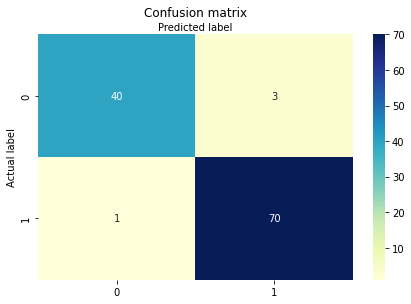

In [9]:
cancer_cnf_matrix = confusion_matrix(cancer_Y_test, cancer_Y_pred)
cancer_cnf_matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cancer_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [10]:
print("Accuracy:",metrics.accuracy_score(cancer_Y_test, cancer_Y_pred))
print("Precision:",metrics.precision_score(cancer_Y_test, cancer_Y_pred, pos_label="Benign"))
print("Recall:",metrics.recall_score(cancer_Y_test, cancer_Y_pred, pos_label="Benign"))

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349


Problem 2

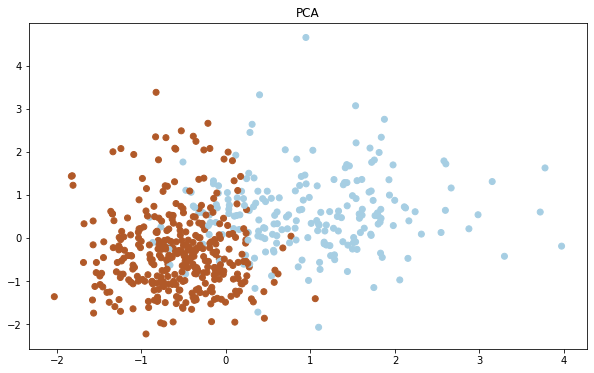

In [13]:
X=cancer_data
Y=cancer.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pcaX = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.title("PCA")
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

In [14]:
accuracy = []
precision = []
recall = []
avg = 0

for k in range(1, 31):
  
  pca = PCA(n_components=k)
  pcaX = pca.fit_transform(X)

  xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

  classifier = LogisticRegression(random_state = 0)
  classifier.fit(xTrain, yTrain)

  yPred = classifier.predict(xTest)

  cmatrix = confusion_matrix(yTest, yPred)

  accuracyTemp = metrics.accuracy_score(yTest, yPred)
  precisionTemp = metrics.precision_score(yTest, yPred) 
  recallTemp = metrics.recall_score(yTest, yPred) 

  accuracy.append(accuracyTemp)
  precision.append(precisionTemp)
  recall.append(recallTemp)

  new = (accuracyTemp + precisionTemp + recallTemp)/3
  if avg < new:
    avg = new
    index = k

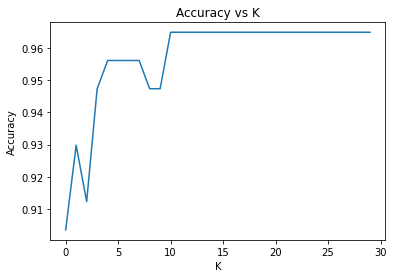

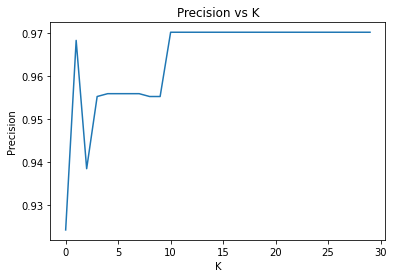

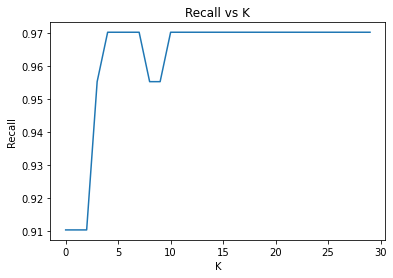

In [16]:
plt.plot(accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()

plt.plot(precision)
plt.xlabel('K')
plt.ylabel('Precision')
plt.title('Precision vs K')
plt.show()

plt.plot(recall)
plt.xlabel('K')
plt.ylabel('Recall')
plt.title('Recall vs K')
plt.show()

In [17]:
pca = PCA(n_components=index)
pcaX = pca.fit_transform(X)

xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

classifier.fit(xTrain, yTrain)

yPred = classifier.predict(xTest)

cmatrix = confusion_matrix(yTest, yPred)

print("Model with highest average accuracy/precision/recall:")
print("K =",index)
print("Accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("Precision =",metrics.precision_score(yTest, yPred)) 
print("Recall = ",metrics.recall_score(yTest, yPred)) 
print("Classification Report: \n",metrics.classification_report(yTest, yPred)) 
print("Confusion Matrix: \n",metrics.confusion_matrix(yTest, yPred))

Model with highest average accuracy/precision/recall:
K = 11
Accuracy = 0.9649122807017544
Precision = 0.9701492537313433
Recall =  0.9701492537313433
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix: 
 [[45  2]
 [ 2 65]]


Problem 3

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

accuracy = []
precision = []
recall = []
avg = 0

for k in range(1, 31):

  pca = PCA(n_components=k)
  pcaX = pca.fit_transform(X)

  xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

  classifier = GaussianNB()
  classifier.fit(xTrain, yTrain)

  yPred = classifier.predict(xTest)

  cmatrix = confusion_matrix(yTest, yPred)

  accuracyTemp = metrics.accuracy_score(yTest, yPred)
  precisionTemp = metrics.precision_score(yTest, yPred) 
  recallTemp = metrics.recall_score(yTest, yPred) 

  accuracy.append(accuracyTemp)
  precision.append(precisionTemp)
  recall.append(recallTemp)

  new = (accuracyTemp + precisionTemp + recallTemp)/3
  if avg < new:
    avg = new
    index = k

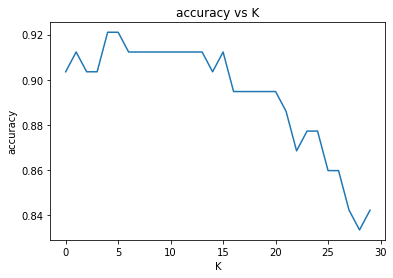

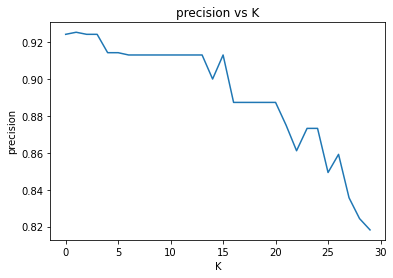

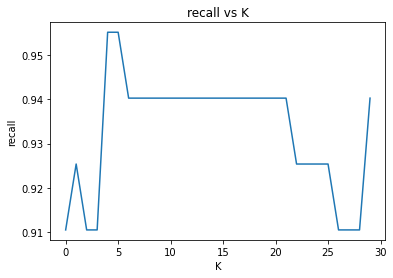

In [20]:
plt.plot(accuracy)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('accuracy vs K')
plt.show()

plt.plot(precision)
plt.xlabel('K')
plt.ylabel('precision')
plt.title('precision vs K')
plt.show()

plt.plot(recall)
plt.xlabel('K')
plt.ylabel('recall')
plt.title('recall vs K')
plt.show()

In [21]:
pca = PCA(n_components=index)
pcaX = pca.fit_transform(X)

xTrain, xTest, yTrain, yTest = train_test_split(pcaX, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

classifier.fit(xTrain, yTrain)

yPred = classifier.predict(xTest)

cmatrix = confusion_matrix(yTest, yPred)

print("Model with highest average accuracy/precision/recall:")
print("K =",index)
print("Accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("Precision =",metrics.precision_score(yTest, yPred)) 
print("Recall = ",metrics.recall_score(yTest, yPred)) 
print("Classification Report: \n",metrics.classification_report(yTest, yPred)) 
print("Confusion Matrix: \n",metrics.confusion_matrix(yTest, yPred))

Model with highest average accuracy/precision/recall:
K = 5
Accuracy = 0.9210526315789473
Precision = 0.9142857142857143
Recall =  0.9552238805970149
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.91      0.96      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

Confusion Matrix: 
 [[41  6]
 [ 3 64]]
